In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

Read the CSV and Perform Basic Data Cleaning

In [62]:
df = pd.read_csv(r'C:\Users\earth\Desktop\class_folder\FinalProject\Resources\final_table_with_conditional.csv')
df.head()


,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks,Price_Status
0,2022-06,2022,Cherokee,362500.0,271.0,38.0,148.0,8.0,76.0,1904.0,407510.0,467.0,NaN,5.52,NaN,-0.052164,2.0,down
1,2022-06,2022,Craven,313500.0,154.0,36.0,196.0,12.0,48.0,1927.0,396716.0,581.0,NaN,5.52,NaN,0.039801,63.0,up
2,2022-06,2022,Catawba,342450.0,207.0,34.0,224.0,0.0,96.0,1923.0,521108.0,508.0,NaN,5.52,NaN,-0.042098,65.0,down
3,2022-06,2022,Gaston,330000.0,283.0,30.0,412.0,12.0,200.0,1668.0,377406.0,828.0,NaN,5.52,NaN,0.039370,99.0,up
4,2022-06,2022,Warren,275000.0,19.0,68.0,12.0,0.0,4.0,1824.0,419452.0,29.0,NaN,5.52,NaN,NaN,1.0,down


In [63]:
#df['violent_crime_rate'] = df['violent_crime_rate'].str.replace(',','').astype(float)
df.dtypes

Date                        object
Year                         int64
County                      object
median_listing_price       float64
active_listing_count       float64
median_days_on_market      float64
new_listing_count          float64
price_increased_count      float64
price_reduced_count        float64
median_square_feet         float64
average_listing_price      float64
total_listing_count        float64
violent_crime_rate          object
30_Year_Fixed_Rate         float64
Number_of_Schools          float64
median_listing_price_mm    float64
Number_of_Parks            float64
Price_Status                object
dtype: object

In [116]:
# Find Missing Ratio of Dataset
# reference: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Date,Date,0.000000
Year,Year,0.000000
County,County,0.000000
median_listing_price,median_listing_price,0.000000
active_listing_count,active_listing_count,0.000000
median_days_on_market,median_days_on_market,0.000000
new_listing_count,new_listing_count,0.000000
price_increased_count,price_increased_count,0.000000
price_reduced_count,price_reduced_count,0.000000
median_square_feet,median_square_feet,0.000000


In [65]:
df["Year"].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016], dtype=int64)

In [97]:
filter_df = df[df['Year'] <2019]
filter_df["Year"].unique()

array([2018, 2017, 2016], dtype=int64)

In [95]:
#percent_missing = filter_df.isnull().sum() * 100 / len(df)
#missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 #'percent_missing': percent_missing})
#missing_value_df

,column_name,percent_missing
Date,Date,0.000000
Year,Year,0.000000
County,County,0.000000
median_listing_price,median_listing_price,0.000000
active_listing_count,active_listing_count,0.000000
median_days_on_market,median_days_on_market,0.000000
new_listing_count,new_listing_count,0.000000
price_increased_count,price_increased_count,0.000000
price_reduced_count,price_reduced_count,0.000000
median_square_feet,median_square_feet,0.000000


In [98]:
filter_df.tail()

,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks,Price_Status
7191,2016-07,2016,Alleghany,227000.0,267.0,116.0,40.0,0.0,20.0,1876.0,280505.0,271.0,138.1,3.44,10.0,NaN,0.0,down
7192,2016-07,2016,Iredell,339000.0,1145.0,74.0,352.0,44.0,404.0,2890.0,508288.0,1474.0,312.6,3.44,150.0,NaN,104.0,down
7193,2016-07,2016,Wilson,117500.0,512.0,52.0,92.0,8.0,80.0,1922.0,150833.0,646.0,398.9,3.44,87.0,NaN,70.0,down
7194,2016-07,2016,Avery,199900.0,378.0,104.0,48.0,0.0,40.0,1864.0,363598.0,380.0,221.1,3.44,40.0,NaN,9.0,down
7195,2016-07,2016,Davidson,170000.0,670.0,99.0,132.0,0.0,152.0,2280.0,225357.0,762.0,166.0,3.44,193.0,NaN,126.0,down


In [99]:

columns = [
    "Date", "Year", "County", "median_listing_price",
    "active_listing_count", "median_days_on_market", "new_listing_count",
    "price_increased_count", "price_reduced_count", "median_square_feet",
    'average_listing_price',"total_listing_count", "violent_crime_rate","Number_of_Parks",
    "Number_of_Schools","30_Year_Fixed_Rate", 
     "Price_Status"]

target = ["Price_Status"]

In [100]:
# Load the data

df_data = filter_df.loc[:, columns].copy()


# Drop the null rows
df_data.dropna()




df_data.reset_index(inplace=True, drop=True)

df_data.head()

,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,Number_of_Parks,Number_of_Schools,30_Year_Fixed_Rate,Price_Status
0,2018-12,2018,Wilkes,224000.0,306.0,126.0,52.0,0.0,28.0,2174.0,352753.0,340.0,243.6,34.0,53.0,4.64,down
1,2018-12,2018,Caswell,253900.0,52.0,183.0,0.0,0.0,4.0,1942.0,354254.0,52.0,NaN,37.0,47.0,4.64,down
2,2018-12,2018,Forsyth,245000.0,1197.0,85.0,296.0,12.0,204.0,2234.0,325987.0,1445.0,660.2,479.0,354.0,4.64,down
3,2018-12,2018,Surry,179900.0,145.0,114.0,28.0,0.0,24.0,1987.0,235683.0,176.0,89,13.0,45.0,4.64,down
4,2018-12,2018,Cherokee,199000.0,545.0,132.0,48.0,0.0,52.0,1708.0,264228.0,547.0,272.1,2.0,26.0,4.64,down


Split the Data into Training and Testing

In [101]:
# Create our features
X = df_data_clean.drop('Price_Status', axis=1)

X = pd.get_dummies(X)

# Create our target
y = df_data_clean.loc[:, target].copy()



In [102]:
X.describe()


,Year,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,...,violent_crime_rate_805.1,violent_crime_rate_82.1,violent_crime_rate_86.1,violent_crime_rate_86.3,violent_crime_rate_86.4,violent_crime_rate_89,violent_crime_rate_920.3,violent_crime_rate_95.9,violent_crime_rate_98.2,violent_crime_rate_98.5
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.00000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,...,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,2017.181609,239562.413793,568.260536,113.965900,156.97931,15.834483,132.331034,2067.973180,316173.622222,728.490421,...,0.004598,0.004598,0.004598,0.002299,0.002299,0.004598,0.004598,0.004598,0.002299,0.004598
std,0.753150,93052.534202,650.648846,41.824278,282.25789,45.725834,233.366958,343.581847,130969.509798,917.663347,...,0.067663,0.067663,0.067663,0.047900,0.047900,0.067663,0.067663,0.067663,0.047900,0.067663
min,2016.000000,74900.000000,12.000000,18.000000,0.00000,0.000000,0.000000,1295.000000,104560.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,169000.000000,159.000000,84.000000,28.00000,0.000000,20.000000,1847.250000,216475.500000,179.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,222447.500000,367.000000,107.000000,72.00000,4.000000,60.000000,1996.000000,285319.500000,434.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,297531.250000,681.500000,137.000000,168.00000,12.000000,144.000000,2250.000000,382653.500000,917.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,549000.000000,4908.000000,330.000000,2256.00000,488.000000,2180.000000,3527.000000,713409.000000,5986.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
# Check the balance of our target values
y.value_counts()

Price_Status
down            2454
up               156
dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                  stratify=y)
X_train.shape


(1957, 391)

Balanced Random Forest Classifier¶

In [105]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1) 
rf_model = rf_model.fit(X_train, y_train)
Counter(y_train['Price_Status'])

Counter({'down': 1840, 'up': 117})

In [106]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[522,  92],
       [  0,  39]], dtype=int64)

In [107]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

# score changes to 1.0 if violent_crime_rate is converted from object to float

0.9250814332247557

In [108]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

       down       1.00      0.85      1.00      0.92      0.92      0.84       614
         up       0.30      1.00      0.85      0.46      0.92      0.86        39

avg / total       0.96      0.86      0.99      0.89      0.92      0.84       653



In [109]:
# List the features sorted in descending order by feature importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)





[(0.20714170087060246, '30_Year_Fixed_Rate'),
 (0.12471914682939902, 'Year'),
 (0.040798106412194904, 'median_days_on_market'),
 (0.03644018899591203, 'Date_2018-09'),
 (0.03439287638956674, 'Number_of_Schools'),
 (0.031333471558375584, 'median_square_feet'),
 (0.031210862139985626, 'Number_of_Parks'),
 (0.030868247266548115, 'active_listing_count'),
 (0.02986196942159671, 'Date_2018-11'),
 (0.02929053421167026, 'median_listing_price'),
 (0.028704527970365285, 'average_listing_price'),
 (0.02839806141415548, 'Date_2018-10'),
 (0.025623081613462717, 'new_listing_count'),
 (0.024424622610338603, 'Date_2018-08'),
 (0.02311125979875717, 'price_reduced_count'),
 (0.02195058249854755, 'total_listing_count'),
 (0.015082661102544657, 'price_increased_count'),
 (0.014623863388672694, 'Date_2018-12'),
 (0.008673876755363132, 'Date_2018-05'),
 (0.006155165837786354, 'Date_2018-06'),
 (0.005165607735032588, 'Date_2018-07'),
 (0.0046245587537131734, 'Date_2018-02'),
 (0.004160873543256652, 'violent

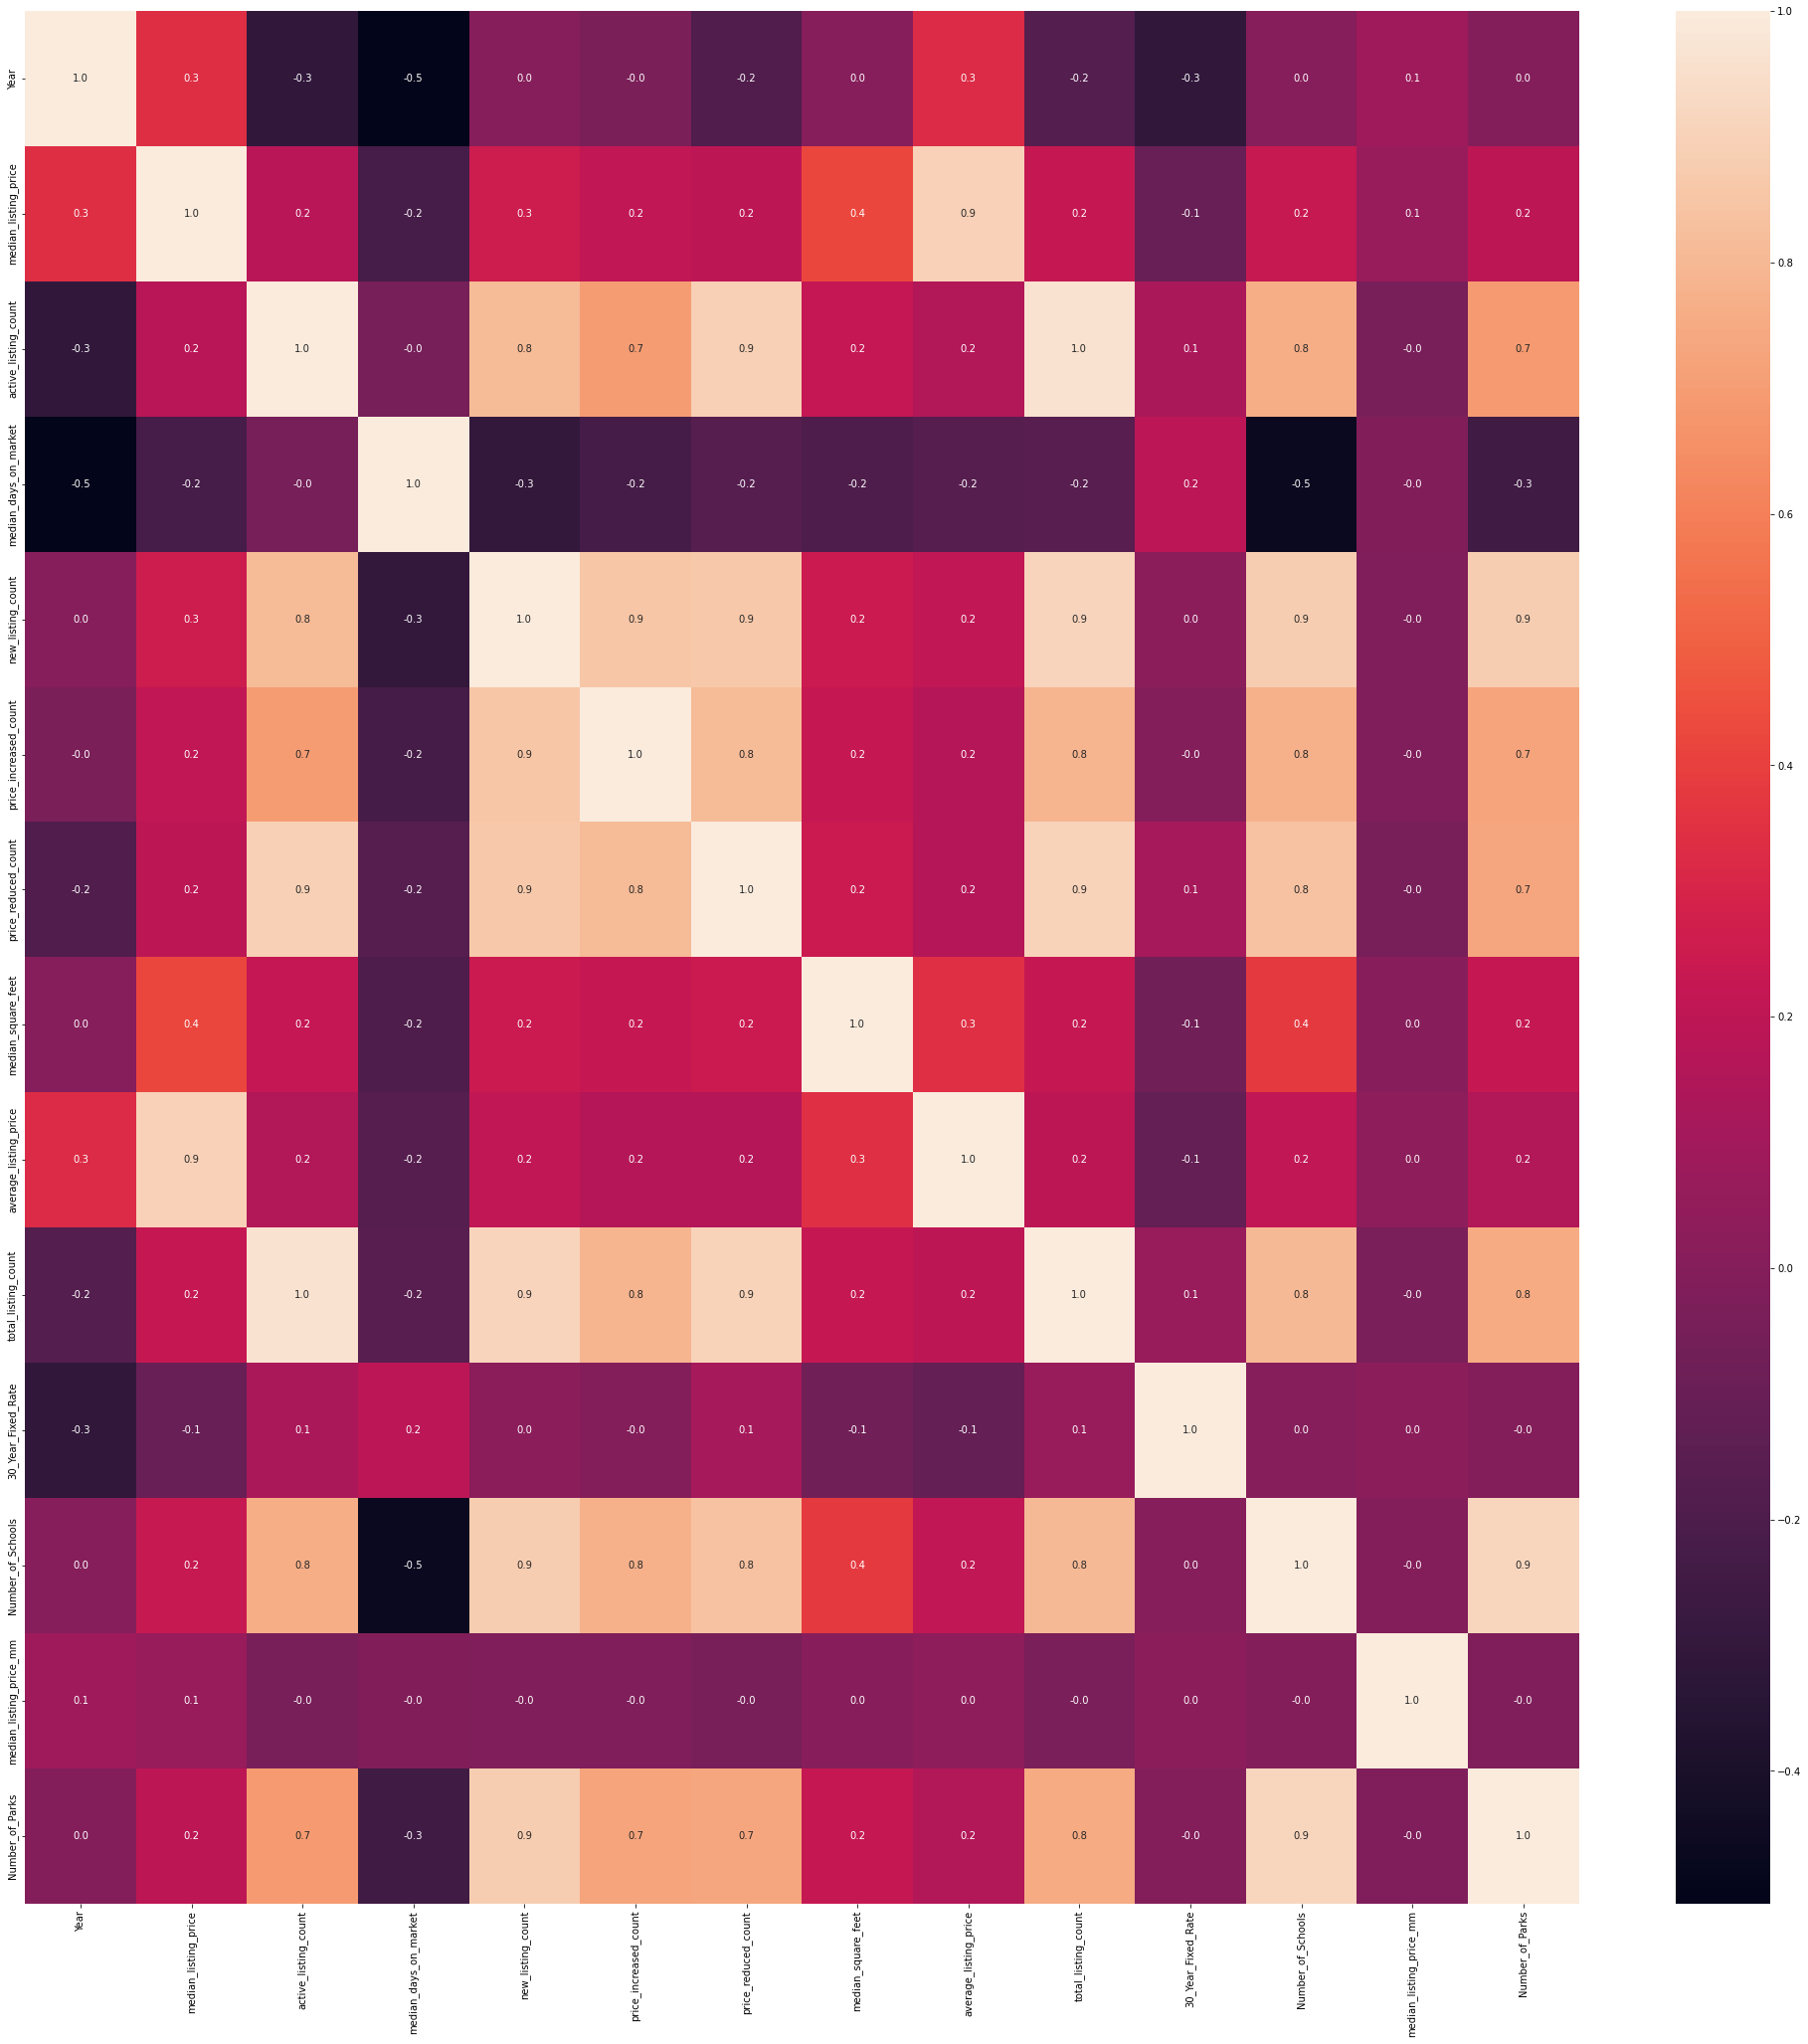

In [110]:
# heat map of feature correlation
plt.rcParams['figure.figsize']=35,35
g = sns.heatmap(df.corr(),annot=True, fmt = ".1f")

<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

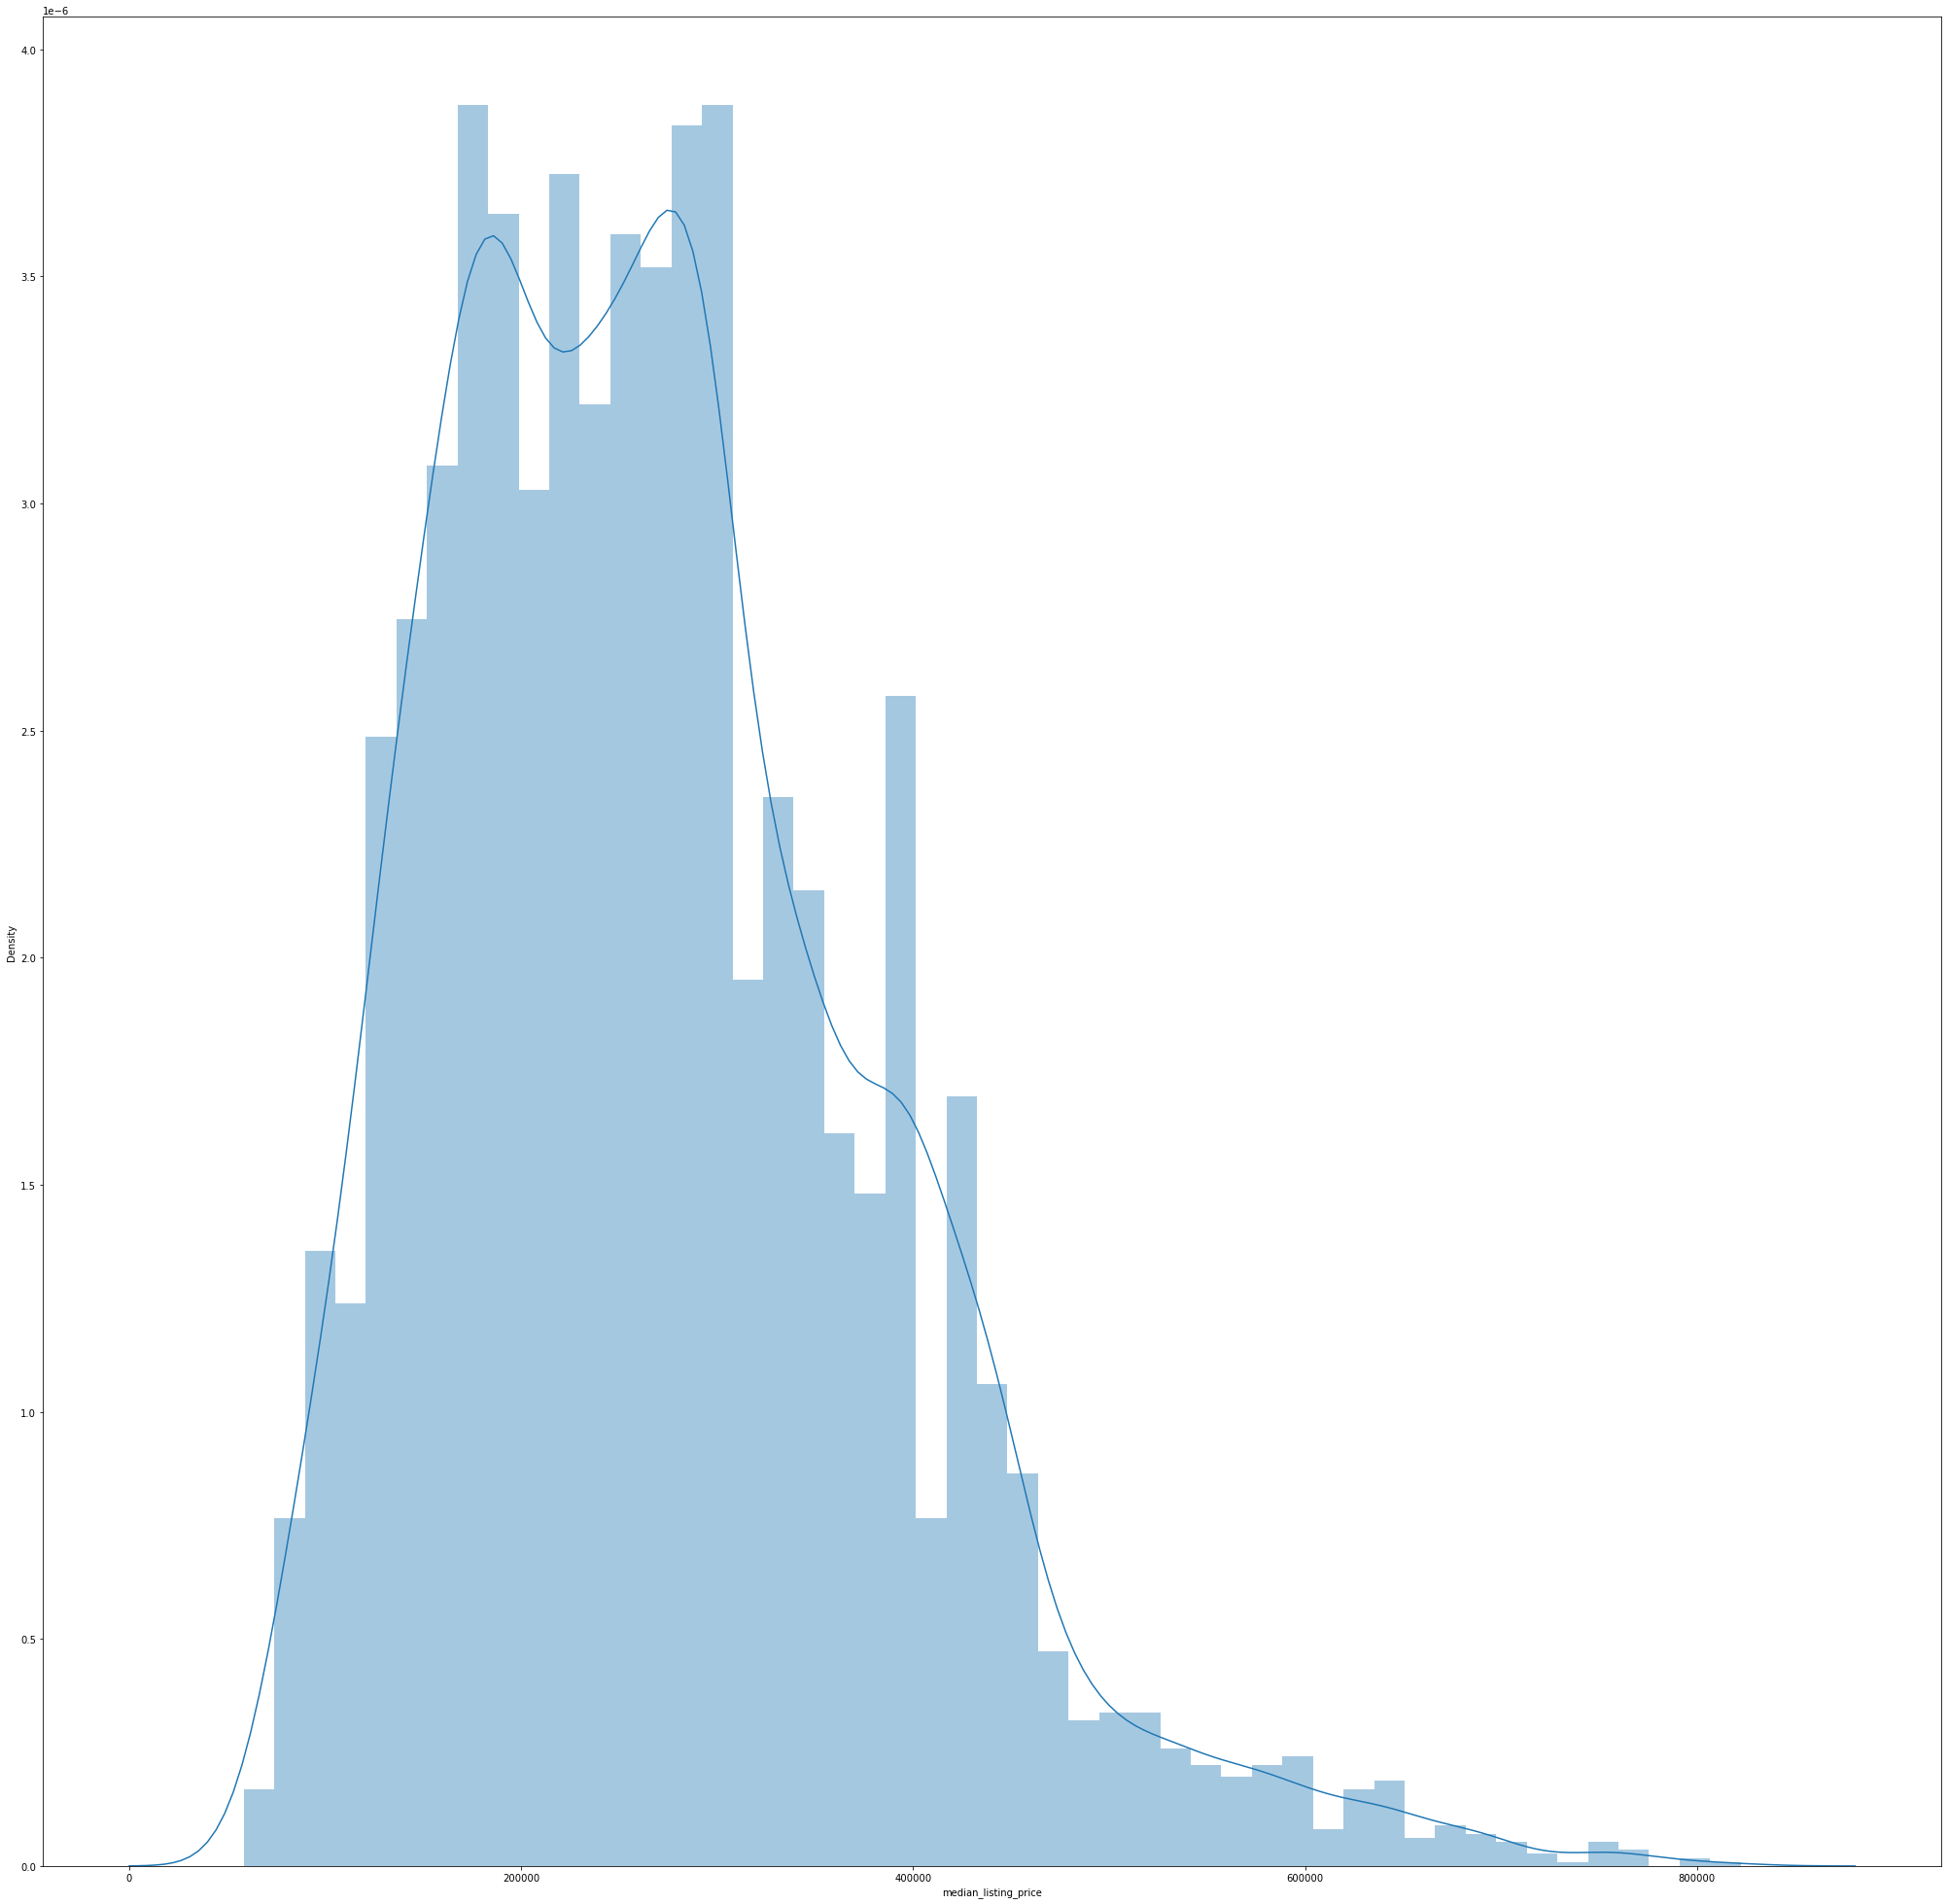

In [112]:
# distribution plot of column
sns.distplot(df['median_listing_price'])

<AxesSubplot:xlabel='Price_Status', ylabel='Density'>

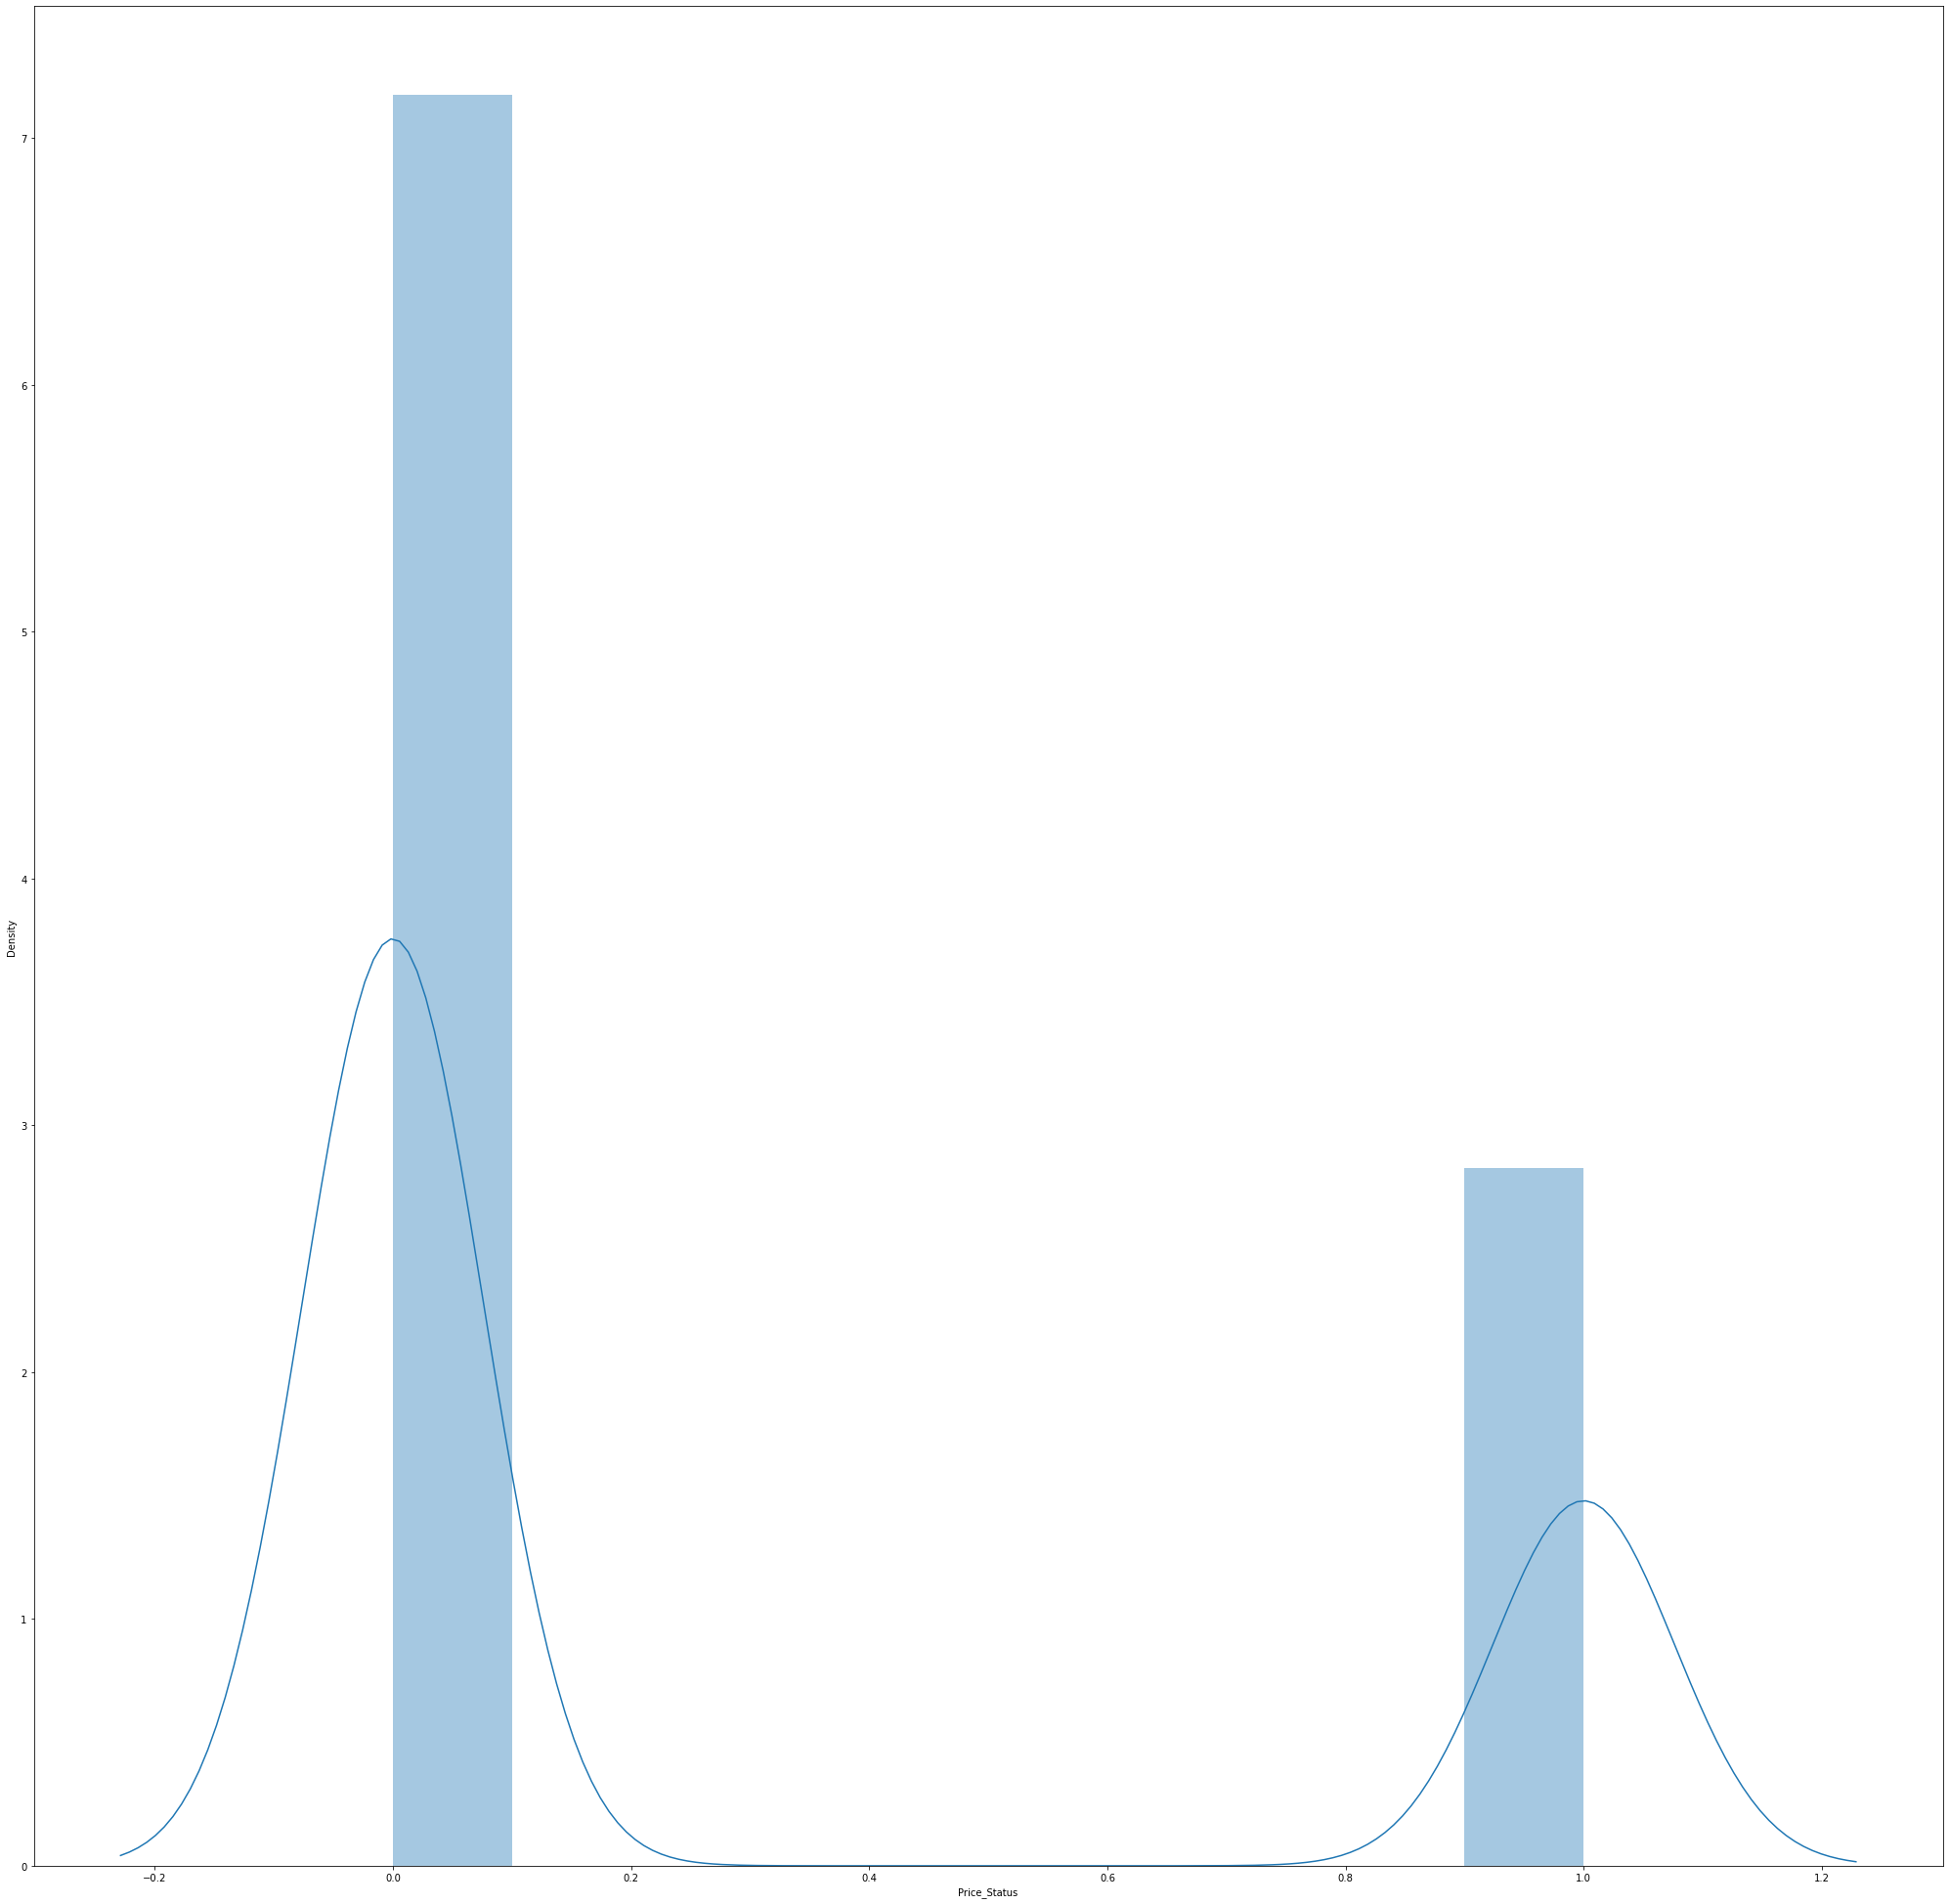

In [114]:
# convert Price_class to numeric, distribution of median_listing_price increase|decrease month/month
df['Price_Status'] = df['Price_Status'].replace(['up','down'],['1','0'])
sns.distplot(df['Price_Status'])

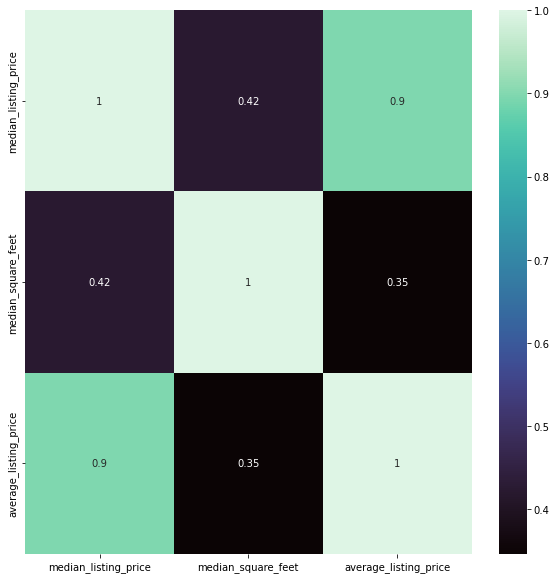

In [115]:
# Reference code for heatmaps :https://www.kaggle.com/code/bsivavenu/house-price-calculation-methods-for-beginners

# most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["median_listing_price"])>0.35]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="mako")

In [ ]:
# reference
# https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners/notebook
#https://www.kaggle.com/code/erick5/predicting-house-prices-with-machine-learning/notebook